In [41]:
import pandas as pd
import numpy as np 

## Pandas 的两个主要数据结构 : 序列Series 和数据框架DataFrame

### 序列Series

In [6]:
obj = pd.Series([4 , 7 , -5 , 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

#### Series的values属性

In [9]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

#### Series的index属性

In [13]:
obj.index

RangeIndex(start=0, stop=4, step=1)

#### 自定义创建Series的索引

In [14]:
obj2 = pd.Series([1,2,3,4] , index = ['a','b','c','d'])
obj2

a    1
b    2
c    3
d    4
dtype: int64

#### 通过索引的方式选取Series中单个值或一组值

In [20]:
obj2['a']

1

In [19]:
obj2[['a','b','c']]

a    1
b    2
c    3
dtype: int64

#### 用布尔型数组过滤

In [21]:
obj2[obj2 > 2]

c    3
d    4
dtype: int64

#### 对整个Series值乘以2

In [22]:
obj2 * 2

a    2
b    4
c    6
d    8
dtype: int64

#### 直接通过字典创建Series

In [25]:
sdata = {'Shanghai' : 2418 , 'Beijing' : 2154 , 'Guangzhou' : 1490 , 'Shenzhen' : 1253}

obj3 = pd.Series(sdata , index = sdata)
obj3

Shanghai     2418
Beijing      2154
Guangzhou    1490
Shenzhen     1253
dtype: int64

#### 自定义索引来改变顺序

In [26]:
states = ['Shenzhen' , 'Guangzhou' , 'Beijing' , 'Shanghai']

obj3 = pd.Series(sdata , index = states)
obj3

Shenzhen     1253
Guangzhou    1490
Beijing      2154
Shanghai     2418
dtype: int64

In [29]:
states1 = ['Shenzhen' , 'Guangzhou' , 'Beijing' , 'Shanghai' , ' Chengdu']

obj4 = pd.Series(sdata , index = states1)
obj4

Shenzhen     1253.0
Guangzhou    1490.0
Beijing      2154.0
Shanghai     2418.0
 Chengdu        NaN
dtype: float64

#### Pandas的 isnull 和 notnull 可以检测缺失数据

In [30]:
pd.isnull(obj4)

Shenzhen     False
Guangzhou    False
Beijing      False
Shanghai     False
 Chengdu      True
dtype: bool

In [31]:
pd.notnull(obj4)

Shenzhen      True
Guangzhou     True
Beijing       True
Shanghai      True
 Chengdu     False
dtype: bool

In [32]:
obj4.isnull()

Shenzhen     False
Guangzhou    False
Beijing      False
Shanghai     False
 Chengdu      True
dtype: bool

### 数据框架DataFrame

In [33]:
data = 
{
    'state' : ['Ohio' , 'Ohio' , 'Ohio' , 'Nevada' , 'Nevada' , 'Nevada'],
    'year' : [2000 , 2001 , 2002 , 2001 , 2002 , 2003],
    'pop' : [1.5 , 1.7 , 3.6 , 2.4 , 2.9 , 3.2]
}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


#### 使用head方法可以显示前五行

In [34]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


#### 指定列排序

In [36]:
pd.DataFrame(data , columns = ['year' , 'state' , 'pop'] , index = [ 1 , 2 , 3 , 4 , 5 , 6 ])

,year,state,pop
1,2000,Ohio,1.5
2,2001,Ohio,1.7
3,2002,Ohio,3.6
4,2001,Nevada,2.4
5,2002,Nevada,2.9
6,2003,Nevada,3.2


#### 获取某一列

In [37]:
frame['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

#### loc 获取某一行 

In [39]:
frame.loc[2]

state    Ohio
year     2002
pop       3.6
Name: 2, dtype: object

#### DataFrame 增加一个新列

In [42]:
frame['GDP'] = np.arange(1,7)
frame

,state,year,pop,GDP
0,Ohio,2000,1.5,1
1,Ohio,2001,1.7,2
2,Ohio,2002,3.6,3
3,Nevada,2001,2.4,4
4,Nevada,2002,2.9,5
5,Nevada,2003,3.2,6


#### 删除

In [43]:
del frame['GDP']

frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


#### 创建DataFrame时传入的是嵌套字典

In [44]:
pop = {'Nevada' : {2001 : 2.4 , 2002 : 2.9 },'Ohio' : {2000 : 1.5 , 2001 : 1.7 ,2002 : 3.6}}

frame2 = pd.DataFrame(pop)
frame2

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


#### 转置

In [45]:
frame2.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


#### 在行/列索引上追加字段

In [46]:
frame2.index .name = 'Year'

frame2

,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [49]:
frame2.columns.name = 'State'

frame2

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


#### 简单可视化

<AxesSubplot:xlabel='State'>

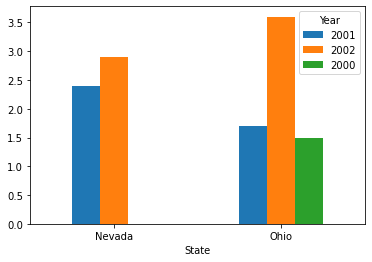

In [53]:
frame2.T.plot.bar(rot = 0)

#### values属性

In [64]:
pop = {'Nevada' : {2001 : 2.4 , 2002 : 2.9 },'Ohio' : {2000 : 1.5 , 2001 : 1.7 ,2002 : 3.6}}

frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [66]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])